# [2023-11-07] Leave-one-out factor importance analysis

This notebook is used to prototype the algorithm for performing "leave-one-factor-out analysis"
to sort factors by held-out log likelihood.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as onp
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from kf_viz import draw_syllable_factors, draw_circadian_bases
sns.set_style("darkgrid")

# Load params and the LOFO fits

In [2]:
wnb_entity = 'eyz'
wnb_project = 'kf-dtd-231022'

true_path = Path('/home/libi/test/')
run_id = 'ig6dh2fo'   # `warm-sweep-116`
run_seed = 1698740237

params_path = Path(f'../temp/{run_id}')
params = onp.load(params_path/'params.npz')
params = (params['G'], params['F1'], params['F2'], params['F3'])
G, F1, F2, F3 = params

K1, K2, K3 = G.shape

print('param shapes: G, F1, F2, F3')
print([param.shape for param in params])

param shapes: G, F1, F2, F3
[(50, 4, 30), (14410, 50), (144, 4), (30, 100)]


In [3]:
# copied from accompanying lofo.npz file
leave_one_out = dict(
ll_1 = onp.array(
    [-1.7537652e+09, -1.7297821e+09, -1.8529139e+09, -1.7050954e+09,
     -1.7069111e+09, -1.7827174e+09, -1.6903112e+09, -1.7885407e+09,
     -1.6667978e+09, -1.7442405e+09, -1.6799776e+09, -1.7377999e+09,
     -1.7515832e+09, -1.7687345e+09, -1.6820951e+09, -1.7374433e+09,
     -1.7782109e+09, -1.8318404e+09, -1.7262614e+09, -1.7128576e+09,
     -1.7684429e+09, -1.7680420e+09, -1.7928415e+09, -1.8131963e+09,
     -1.7468570e+09, -1.6662085e+09, -1.6805407e+09, -1.7550546e+09,
     -1.7461563e+09, -1.6684175e+09, -1.6912829e+09, -1.7358223e+09,
     -1.7649285e+09, -1.7567180e+09, -1.7423453e+09, -1.9282627e+09,
     -1.7432870e+09, -1.8394135e+09, -1.7156484e+09, -1.7084462e+09,
     -1.7871058e+09, -1.6838019e+09, -1.7079049e+09, -1.7575168e+09,
     -1.7656983e+09, -1.7470945e+09, -1.7159031e+09, -1.7306506e+09,
     -1.7289905e+09, -1.7513190e+09,]
),
ll_2 = onp.array(
    [-2.5495217e+09, -2.4881725e+09, -2.1595662e+10, -1.0109768e+10,]
),
ll_3 = onp.array(
    [-1.8114092e+09, -1.7115036e+09, -1.8115242e+09, -1.7963295e+09,
     -1.8169121e+09, -1.7747494e+09, -1.8563132e+09, -3.1589430e+09,
     -1.8668319e+09, -1.7606072e+09, -3.6712415e+09, -3.3338332e+09,
     -1.7203116e+09, -1.7285549e+09, -1.8322732e+09, -1.8520554e+09,
     -1.7075622e+09, -3.1688064e+09, -1.8218572e+09, -6.4150815e+09,
     -1.7256721e+09, -1.9038003e+09, -2.2038374e+09, -1.7277478e+09,
     -6.0223375e+09, -2.1011812e+09, -1.8685338e+09, -1.8320192e+09,
     -1.6999386e+09, -1.9555524e+09,]
)
)

ref_ll = -3874.3681640625 * (14410 * 144 * 0.2) # avg_test_ll * (~mask.sum())

In [4]:
# Lofi results...so muchfaster!!

# copied from accompanying lofi.npz file
leave_one_in = dict(
ll_1 = onp.array(
    [-7.1453401e+10, -7.8399398e+10, -6.3677596e+10, -5.7371156e+10,
     -7.7572055e+10, -7.5946918e+10, -6.1451547e+10, -6.7098247e+10,
     -7.2258945e+10, -6.6471621e+10, -9.1851112e+10, -8.0087581e+10,
     -5.5968334e+10, -7.3964241e+10, -7.4787209e+10, -7.1841972e+10,
     -5.9893744e+10, -5.7032008e+10, -6.3475847e+10, -7.4789929e+10,
     -7.0372491e+10, -6.8457054e+10, -6.2983102e+10, -8.4668891e+10,
     -6.6242634e+10, -7.3644540e+10, -7.1523287e+10, -6.8307608e+10,
     -7.2571945e+10, -8.1290412e+10, -7.8338056e+10, -6.7078459e+10,
     -6.8390085e+10, -6.0623249e+10, -7.0906683e+10, -5.6018084e+10,
     -7.0053773e+10, -6.9091033e+10, -7.1798333e+10, -8.4151697e+10,
     -7.7343908e+10, -7.0442590e+10, -6.1746233e+10, -6.9327970e+10,
     -7.2033206e+10, -7.9671411e+10, -8.2064925e+10, -6.8866662e+10,
     -6.8963918e+10, -7.3959752e+10,]
    ),
ll_2 = onp.array(
    [-6.0819980e+10, -5.5897371e+10, -4.4878266e+10, -4.5807428e+10,]
),
ll_3 = onp.array(
    [-7.2004190e+10, -7.8663238e+10, -8.5027127e+10, -9.1326128e+10,
     -7.9308030e+10, -8.3022922e+10, -8.4051100e+10, -8.2450989e+10,
     -8.3701531e+10, -7.9594873e+10, -9.5707161e+10, -8.1555800e+10,
     -7.8173487e+10, -9.4733894e+10, -8.1646338e+10, -9.0546676e+10,
     -8.3052085e+10, -8.0861176e+10, -7.9114224e+10, -9.2850684e+10,
     -9.8111513e+10, -9.2952338e+10, -7.1646929e+10, -9.7541243e+10,
     -7.6809175e+10, -8.2874450e+10, -9.4163288e+10, -9.3671277e+10,
     -8.2569380e+10, -7.5416216e+10]
)
)

Now, given the held-out log likelihoods, we sort the factors from lowest to highest log likelihood.
The lower the "leave-one-out" log likelihood, the more that that factor contributed to the goodness-of-fit.
We evaluate the LOFO held-out log likelihood, $\ell_{\setminus k}$, as well as compute the fraction difference from the reference,
all-factors-included held-out log likleihood, $\ell_\textrm{ref}$,
$$
\textrm{frac diff} = \frac{\ell_{\textrm{ref} - \ell_{\setminus k}}}{\ell_\textrm{ref}}
$$

Text(0.5, 1.1, 'histogram of held out ll  |  run_id: ig6dh2fo, rank=(50, 4, 30)')

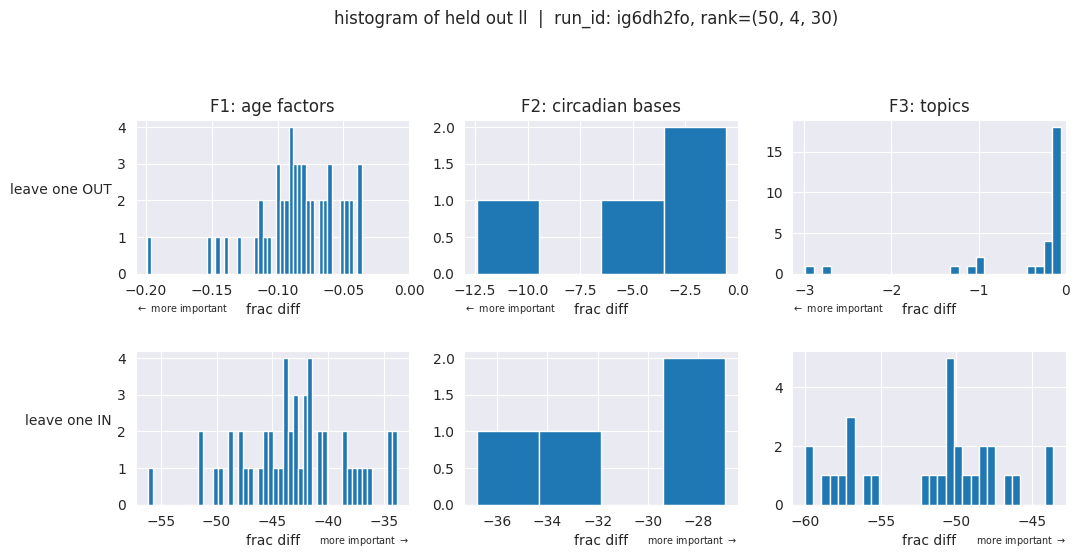

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,5),
                        gridspec_kw={'hspace': 0.5})

for i, title in enumerate(['age factors', 'circadian bases', 'topics']):
    # Leave one out
    ll = leave_one_out[f'll_{i+1}']
    frac_diff = (ref_ll - ll) / ref_ll

    ax = axs[0,i]
    ax.hist(frac_diff, bins=G.shape[i])
    ax.set_title(f'F{i+1}: {title}')
    ax.set_xlabel('frac diff')
    ax.set_xlim(right=0)
    ax.annotate(r'$\leftarrow$ more important', (0,-0.25), xycoords='axes fraction', ha='left', fontsize='x-small')

    # Leave one in
    ll = leave_one_in[f'll_{i+1}']
    frac_diff = (ref_ll - ll) / ref_ll

    ax= axs[1,i]
    ax.hist(frac_diff, bins=G.shape[i])
    # ax.set_title(f'F{i+1}: {title}')
    ax.set_xlabel('frac diff')
    # ax.set_xlim(right=-25)
    ax.annotate(r'more important $\rightarrow$', (1, -0.25), xycoords='axes fraction', ha='right', fontsize='x-small')

axs[0,0].set_ylabel('leave one OUT', ha='right', rotation=0)
axs[1,0].set_ylabel('leave one IN', ha='right', rotation=0)
fig.suptitle(f'histogram of held out ll  |  run_id: {run_id}, rank={G.shape}', y=1.1)

These results are a bit surprising...I would have expected that the distributions be (qualitatively) similar between
using a single factor vs. leaving one factor out. Where might this discrepancy come from?
- Using a model with just a single factor in one of the modes is so detrimental that we lose "SNR" of principle factor
- Could this be a numerical thing? We expected our probabilities to sum to one -- but this is violated in both cases (especially in leave one in)
    - [TODO] normalize factor probs such that [G, phi, theta, k] sum to 1 in the syllable component.

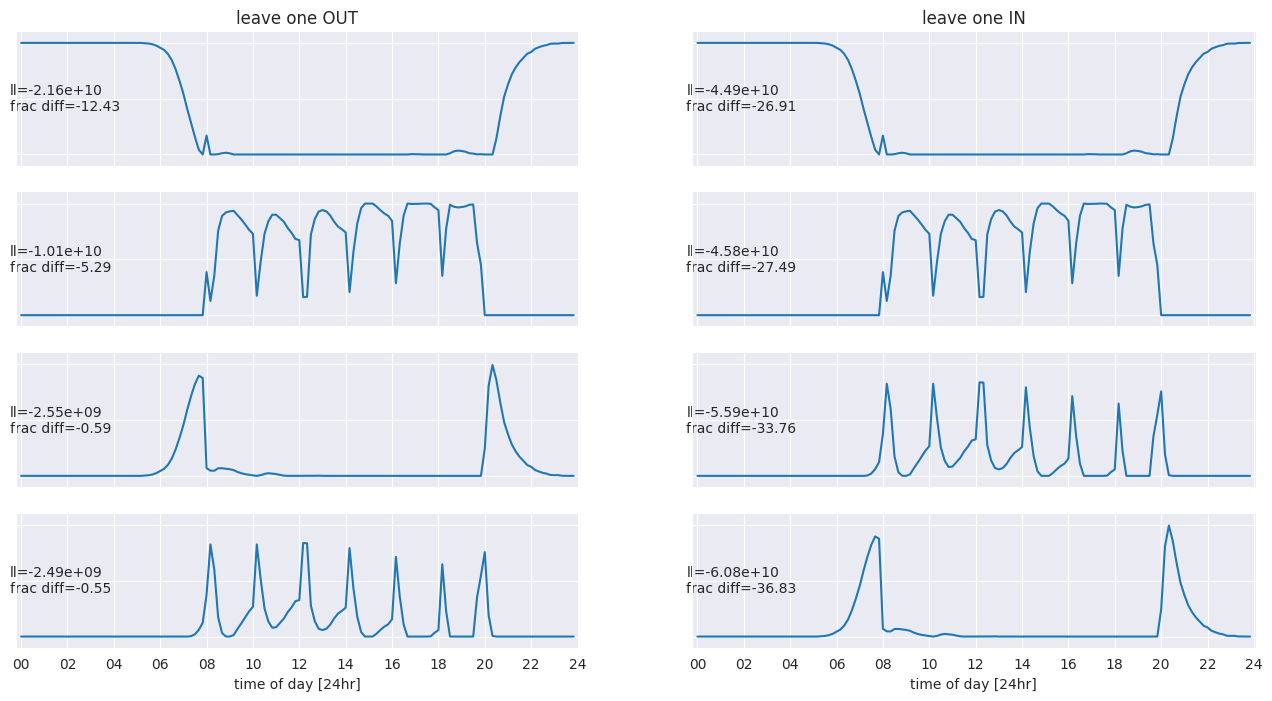

In [6]:
fig = plt.figure(figsize=(16,8))

gs_outer = GridSpec(nrows=1, ncols=2)

G, F1, F2, F3 = params
D2, K2 = F2.shape

for i, (results_dict, title, reverse) in enumerate(
    zip([leave_one_out, leave_one_in], ['leave one OUT', 'leave one IN'], [False, True])):

    ll = results_dict['ll_2']
    frac_diff = (ref_ll - ll) / ref_ll
    idxs_sorted = onp.argsort(ll)
    idxs_sorted = idxs_sorted if not reverse else idxs_sorted[::-1]
    
    # Draw factors
    gs_inner = gs_outer[:,i].subgridspec(K2, 1)
    axs = [fig.add_subplot(gs_inner[i_k]) for i_k in range(K2)]
    draw_circadian_bases((G, F1, F2[:,idxs_sorted], F3), autosort=False, axs=axs)

    # Label factors with ll and frac diff
    for ax, idx in zip(axs, idxs_sorted):
        ax.set_ylabel(f'll={ll[idx]:.2e}\nfrac diff={frac_diff[idx]:.2f}', rotation=0, ha='left', va='center',)

    axs[0].set_title(title)

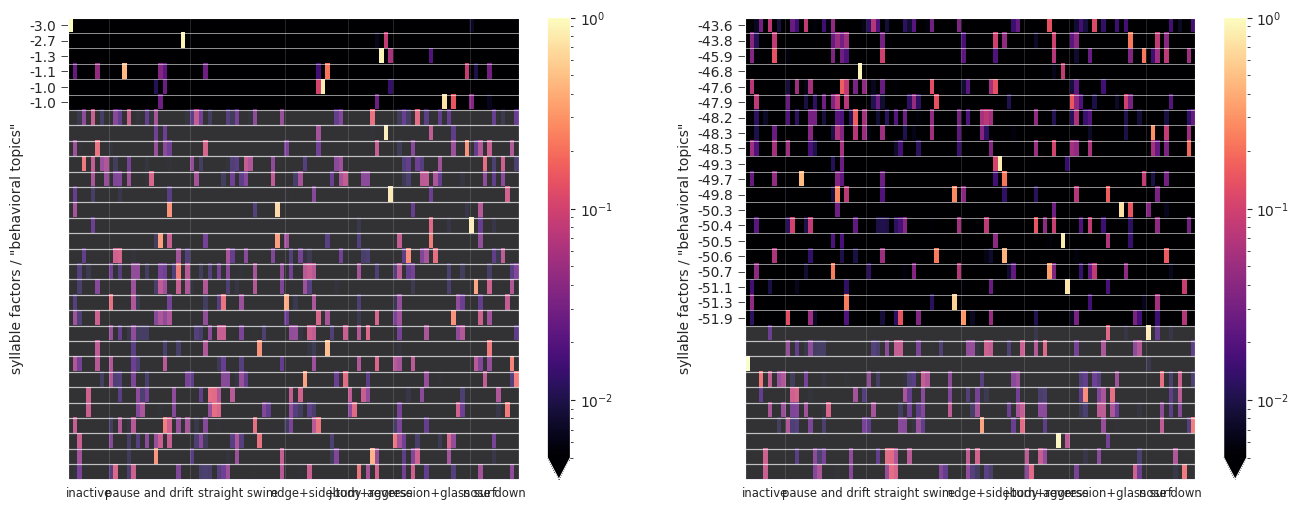

In [8]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(16,6))

gs_outer = GridSpec(nrows=1, ncols=2)

G, F1, F2, F3 = params
K3, D3 = F3.shape

for i, (results_dict, title, reverse, thresh) in enumerate(
    zip([leave_one_out, leave_one_in], ['leave one OUT', 'leave one IN'], [False, True], [-0.75, -55])):

    ll = results_dict['ll_3']
    idxs_sorted = onp.argsort(ll)
    idxs_sorted = idxs_sorted if not reverse else idxs_sorted[::-1]
    ll = ll[idxs_sorted]
    frac_diff = (ref_ll - ll) / ref_ll

    ax = fig.add_subplot(gs_outer[:,i])
    draw_syllable_factors((G, F1, F2, F3[idxs_sorted,:]), autosort=False, ax=ax)

    # If a factor is not within threshold, "dim" it with transparent white mask
    mask = (frac_diff <= thresh) if not reverse else (frac_diff >= thresh)
    for i in onp.nonzero(~mask)[0]:
        rect = Rectangle((-0.5,i-0.5,), 100, 1, facecolor='w', alpha=0.2)
        ax.add_patch(rect)
    
    # Set minor ticks, so as not to affect gridding
    # ax.yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
    ax.set_yticks(onp.nonzero(mask)[0], minor=True)
    ax.set_yticklabels([f'{f:.1f}' for f in frac_diff[mask]], minor=True)
    ax.tick_params(axis='y', which='minor', left=True, length=5)

    # Label factors with ll and frac diff
    for ax, idx in zip(axs, idxs_sorted):
        ax.set_ylabel(f'll={ll[idx]:.2e}\nfrac diff={frac_diff[idx]:.2f}', rotation=0, ha='left', va='center',)

    ax.set_title(title)